# Module 6 Assignment

In [32]:
# Import Library
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [33]:
# Global Filename and Dataframe
filename = 'MCIS540_M6_Data.csv'
df = read_file(filename)
    

# Read File Function
def read_file(filename):
    df = pd.read_csv(filename)
    return df

In [44]:
# View Global Dataframe Information
def view_dataframe(df):
    # View first 5 Rows of Data
    print(df.head())

    # Add Whitespace
    print('\n')

    # View Column Data Types
    print(df.dtypes)

view_dataframe(df)

   Sepal Length  Sepal Width  Petal Length  Petal Width         Name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Name             object
dtype: object


#### The data contains 4 columns of float64 pandas data type and 1 column of pandas object data type.  The object data type in pandas typically refers to a string or mixed data type in python. 

In [106]:
# Uses pandas describe() function and appends the values of the var() and ptp() functions to also capture variance and range
def describe_dataset(df, stats):
    df_describe = df.describe()
    return df_describe.append(df.reindex(df_describe.columns, axis=1).agg(stats))
    
# Changes the 'ptp' index to 'range' for easier analysis  
def modify_index_name(df):
    df_describe_unmodified = describe_dataset(df, ['var', 'ptp'])
    df_describe_modified = df_describe_unmodified.rename(index={'ptp': 'range'})
    return df_describe_modified

# calls the above functions and stores the returned data in df_describe
df_describe = modify_index_name(df)

# prints df_describe
print(df_describe)



       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
var        0.685694     0.188004      3.113179     0.582414
range      3.600000     2.400000      5.900000     2.400000


<Figure size 720x720 with 0 Axes>

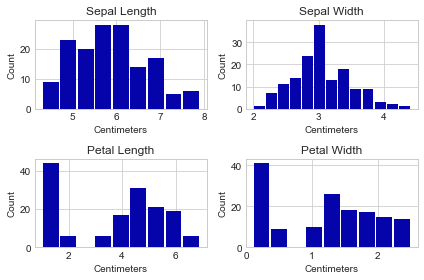

In [101]:
def create_histograms(df):
    fig = plt.figure(figsize = (10,10))
    f, a = plt.subplots(2,2) # Establish 2x2 plot formation
    a = a.ravel() # Converts subplots into flattened array

    # For each feature creates histogram
    for idx,ax in enumerate(a):# Enumerate allows index and value to be stored in idx and ax
        ax.hist(df.iloc[:,idx], bins='auto', color='#0504aa', alpha=1, rwidth=.9) # Set Bins to 'Auto' and rwidth to < 1 for easy viewing
        ax.set_title(df.columns[idx]) # Sets Title of Histogram
        ax.set_ylabel('Count')# Sets Y Label
        ax.set_xlabel('Centimeters') #Sets X Label

    plt.tight_layout()

create_histograms(df)

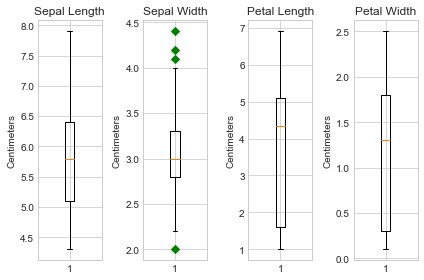

In [99]:

f, a = plt.subplots(1, 4)
a = a.ravel()

for idx,ax in enumerate(a):# Enumerate allows index and value to be stored in idx and ax
    ax.boxplot(df.iloc[:,idx],  0, 'gD') # Set Bins to 'Auto' and rwidth to < 1 for easy viewing
    ax.set_title(df.columns[idx]) # Sets Title of Histogram
    ax.set_ylabel('Centimeters')
    
plt.tight_layout()